In [10]:
import pandas as pd 
# Creating a new column called 'SENTIMENT' that contains the sentiment scores of each review using nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter


In [26]:
reviews = pd.read_csv("C:\\Users\\Sharon\\Desktop\\BA Data\\reviews.csv")
pd.set_option('display.max_columns', None)

print(reviews.info())
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None
                                             reviews
0    24 hours before our departure on BA059 to Ca...
1    We arrived at Heathrow at 0600 to find our f...
2    Original flight was cancelled with no explan...
3    Airport check in was functionary with little...
4    Flight fine. In-line with competitors. Pleas...


In [8]:
#Drop null values if any
reviews.dropna(inplace=True)


In [34]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the reviews DataFrame
#reviews = pd.read_csv('your_reviews_file.csv')

# Create an instance of the SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores using VADER
def get_sentiment(review):
    return sentiment_analyzer.polarity_scores(review)['compound']

# Apply the function to the 'reviews' column and assign the results to a new column 'SENTIMENT'
reviews['SENTIMENT'] = reviews['reviews'].apply(get_sentiment)

# Print the updated DataFrame

print(reviews)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sharon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               reviews  SENTIMENT  \
0      24 hours before our departure on BA059 to Ca...    -0.2558   
1      We arrived at Heathrow at 0600 to find our f...    -0.9124   
2      Original flight was cancelled with no explan...     0.0258   
3      Airport check in was functionary with little...    -0.4903   
4      Flight fine. In-line with competitors. Pleas...     0.7650   
5      Came from Glasgow to London and took connect...     0.2584   
6      My flight on on 12 May 2023 got delayed an h...    -0.9704   
7      Cairo is a 5 hour flight and BA considers it...    -0.8760   
8      After travelling London to Madrid with Briti...    -0.7304   
9      My luggage was mis-tagged in Dallas on my wa...    -0.7050   
10     The airline lost my luggage and was absolute...    -0.7990   
11     We booked on the BA website, round trip flig...     0.7184   
12     First time flying with BA business class, ne...    -0.7096   
13    You can buy sandwiches and c

In [50]:
import IPython
from IPython.display import display
#pd.set_option('display.max_columns', None)

In [51]:
def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to the 'SENTIMENT' column and assign the results to a new column 'SENTIMENT_LABEL'
reviews['SENTIMENT_LABEL'] = reviews['SENTIMENT'].apply(get_sentiment_label)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_colwidth', 4)
pd.set_option("display.max_columns", None)
#Print the updated DataFrame
display(reviews)


,reviews,SENTIMENT,SENTIMENT_LABEL
0,24 hours before our departure on BA059 to Ca...,-0.2558,Negative
1,We arrived at Heathrow at 0600 to find our f...,-0.9124,Negative
2,Original flight was cancelled with no explan...,0.0258,Neutral
3,Airport check in was functionary with little...,-0.4903,Negative
4,Flight fine. In-line with competitors. Pleas...,0.7650,Positive
...,...,...,...
995,Madrid to Heathrow. I fly with BA on a regul...,-0.9802,Negative
996,Singapore to London. They wanted to charge me...,0.6369,Positive
997,Washington to Frankfurt via London. Check-In...,0.9738,Positive
998,Rome to London. Our flight was delayed from ...,-0.2617,Negative


SENTIMENT_LABEL
Positive    50.6
Negative    48.1
Neutral      1.3
Name: count, dtype: float64


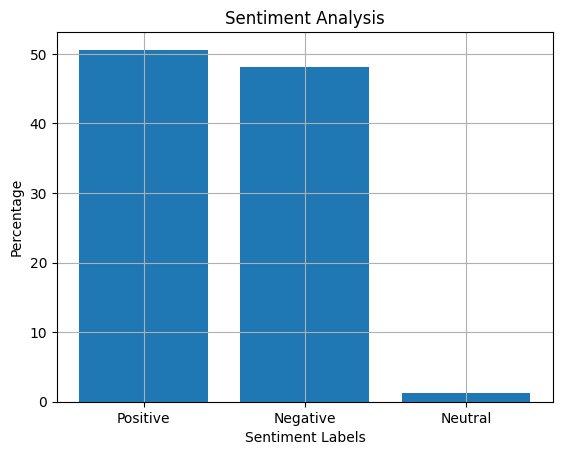

In [67]:

# Calculate the counts of each sentiment label
sentiment_counts = reviews['SENTIMENT_LABEL'].value_counts()

# Calculate the percentages
sentiment_percentages = (sentiment_counts / len(reviews)) * 100

print(sentiment_percentages)

# Create a bar chart
plt.bar(sentiment_percentages.index, sentiment_percentages)

# Customize the chart
plt.xlabel('Sentiment Labels')
plt.ylabel('Percentage')
plt.title('Sentiment Analysis')
plt.grid(True)

# Display the chart
plt.show()


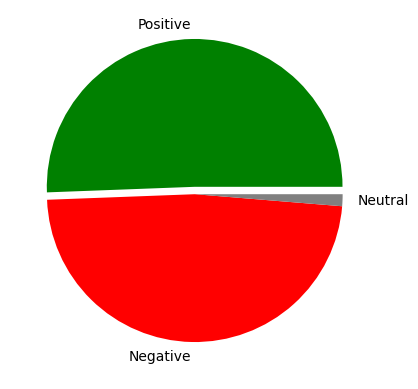

In [68]:
# create the pie chart
fig, ax = plt.subplots()
ax.pie(
    sentiment_percentages,
    labels=sentiment_percentages.index,
    colors=['green', 'red', 'grey'],
    explode=[0.05, 0, 0]
      )

plt.show()

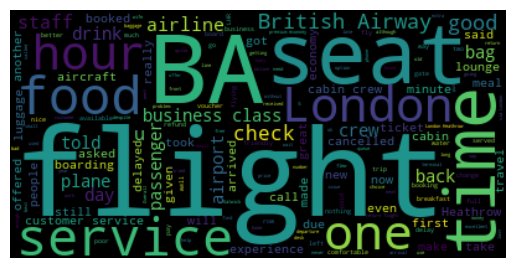

In [65]:
# Create the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join((reviews['reviews'])))

# Show the word cloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()